In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml
from typing import Tuple
from tqdm import tqdm
from numpy.typing import NDArray
import torch
from torch import Tensor
from torch.utils.data import DataLoader
from torch.optim import Optimizer, AdamW
from torch.utils.data import Dataset
from torch.nn import Module
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
X = None
y = None
with open('../dirs.yaml', 'r') as file:
    dirs = yaml.safe_load(file)['homework-1']
    X = pd.read_csv(dirs['train']['x'])
    y = pd.read_csv(dirs['train']['y'])
    
df = pd.merge(X, y, on='Unnamed: 0').drop(columns=['Unnamed: 0'])
X = df.drop(columns=['year'])
y = df['year']

    

In [3]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,year
0,37.47518,-14.34414,40.54872,-9.10171,16.77175,-17.77113,-16.50156,-4.09543,2.49723,-0.46428,...,-115.62803,-13.79660,31.60436,28.95927,-25.93164,67.64670,-25.76691,-81.90373,-61.48682,2001
1,48.17393,-7.02208,-30.36086,-2.41924,2.15406,-8.44502,-1.68191,-8.71434,-7.83802,-5.58019,...,24.58950,-36.95682,0.73922,-0.06330,53.75838,-81.05330,8.42811,12.08694,-1.91676,2006
2,36.58141,26.03203,-4.92774,35.71620,8.53080,3.73167,-7.98443,-7.43976,-1.69797,10.75028,...,-366.07968,-62.38201,113.48188,4.72741,181.64459,-134.46216,8.50795,94.15573,-8.47276,1989
3,41.15615,-17.77029,-32.30961,-21.03778,12.80330,-13.48031,-3.14951,-7.62647,-4.48901,-4.29075,...,-79.64532,-77.08169,38.88094,28.52025,24.17783,-86.62542,-1.19418,-74.73449,-17.28130,1997
4,40.54855,78.77563,-23.29877,98.60192,-30.11496,26.94220,-8.87771,-3.23280,-1.04841,31.69655,...,-252.61021,118.93768,-155.87390,51.85666,-365.15815,59.34936,52.47311,99.00695,-10.18840,2001
5,52.33593,2.89543,56.90252,8.96987,-25.76965,-15.71307,3.50595,-8.96479,1.19235,-4.97747,...,37.47755,-14.58737,120.49606,-14.30169,-75.96685,40.57184,0.99512,60.78252,-15.17380,2009
6,50.93086,2.40169,35.79261,-0.07677,-40.96232,-17.04343,-10.91591,-11.32212,4.69807,-2.25197,...,-110.61446,-60.67350,4.09050,1.17609,-89.90531,50.88912,-6.94646,174.95178,26.32797,2009
7,44.11978,11.85193,57.67591,-14.54233,4.04202,6.18560,-12.82692,4.09408,11.87608,2.09057,...,-64.08981,396.40911,312.23906,10.09221,-220.19327,144.47076,29.26308,-717.40632,45.79519,2000
8,40.79316,39.50647,27.37837,-11.96658,-5.43111,-6.25519,0.21025,5.37451,9.27321,10.06320,...,30.89832,185.94793,55.47131,12.10047,-35.04364,15.84014,4.84509,48.40314,-7.48619,1976
9,38.31416,-28.59876,-1.87686,-10.30072,11.44784,1.15831,-20.47703,-2.45890,9.27336,-1.97484,...,-44.63124,93.55093,84.37248,-10.88730,-33.68677,-57.70108,13.22433,-51.66323,11.02160,1994


In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,year
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,...,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,43.394558,1.540279,8.378243,1.315349,-6.476035,-9.503415,-2.243164,-1.660698,3.543946,1.892996,...,-72.008182,41.154440,37.892338,0.145765,17.576243,-28.502296,4.474666,17.717701,1.227647,1998.366714
std,6.074562,51.578894,35.742553,16.622971,22.823521,12.926176,14.700348,8.035388,10.629817,6.602191,...,171.932584,120.075095,96.748418,16.162963,115.706029,180.463987,13.592096,185.335542,22.018997,11.048088
min,7.199890,-302.031900,-257.525600,-120.723150,-142.160680,-60.198620,-100.602550,-51.443820,-75.539550,-31.344160,...,-1976.846950,-791.832320,-1237.931680,-227.608010,-2678.193680,-3059.906060,-100.618700,-5000.654060,-286.031200,1922.000000
25%,39.970260,-25.603507,-11.773080,-8.490435,-20.716735,-18.524397,-10.651808,-6.402985,-2.573275,-2.446435,...,-138.560657,-21.424297,-4.443660,-7.027105,-32.236598,-101.305695,-2.563620,-60.364940,-8.873683,1994.000000
50%,44.282770,8.800720,10.226865,-0.582025,-5.808040,-11.254920,-2.007255,-1.516640,3.658655,1.763500,...,-52.984525,29.218730,33.576620,0.770135,15.522650,-22.050410,3.021435,6.982460,-0.050725,2002.000000
75%,47.843418,36.610743,29.596557,9.035892,7.858092,-2.198952,6.725500,3.111740,9.935210,6.245860,...,14.405743,89.374030,78.710667,8.380725,66.429958,50.378898,9.912000,86.542642,9.664982,2006.000000
max,57.408630,240.617010,318.868960,143.841600,142.305480,68.300090,147.965260,52.331120,78.149440,36.596180,...,1081.951340,1473.745210,1458.580210,199.121500,1620.749740,1879.332480,352.359540,3165.372860,245.209770,2011.000000


**Выводы:**
 1) Наибольшее число песен в диапазоне от 1994 до 2006
 3) У некоторых данных достаточно большая дисперсия

Из [предоставленого источника](https://archive.ics.uci.edu/dataset/203/yearpredictionmsd) можно узнать, что в датасете:
90 атрибутов, 12 = средний тон, 78 = ковариация тона
Первое значение — год (целевая переменная), диапазон от 1922 до 2011.
Характеристики, извлеченные из 'timbre' характеристик API The Echo Nest.
Берется среднее значение и ковариацию для всех 'сегментов', каждый сегмент
описывается 12-мерным вектором timbre. 

**Пояснение:**

Пусть трек состоит из $N$ сегментов, тогда можно записать в виде матрицы:
$$
\begin{pmatrix} t_{1,1} & ... & t_{1,12} \\ ... & ... & .. \\ t_{N,1} & ... & t_{N,12} \end{pmatrix}
$$
Тогда:

Первые 12 значений:
$$
\mu = \frac{1}{N}\sum\limits_{i=1}^NT_i \\
\Sigma = \frac{1}{N-1}(T - 1\mu^T)^T(T - 1\mu^T)
$$

78 - чтобы не повторять значения

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 91 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       14000 non-null  float64
 1   1       14000 non-null  float64
 2   2       14000 non-null  float64
 3   3       14000 non-null  float64
 4   4       14000 non-null  float64
 5   5       14000 non-null  float64
 6   6       14000 non-null  float64
 7   7       14000 non-null  float64
 8   8       14000 non-null  float64
 9   9       14000 non-null  float64
 10  10      14000 non-null  float64
 11  11      14000 non-null  float64
 12  12      14000 non-null  float64
 13  13      14000 non-null  float64
 14  14      14000 non-null  float64
 15  15      14000 non-null  float64
 16  16      14000 non-null  float64
 17  17      14000 non-null  float64
 18  18      14000 non-null  float64
 19  19      14000 non-null  float64
 20  20      14000 non-null  float64
 21  21      14000 non-null  float64
 22

# Базовые классы

In [6]:
class MyDataset(Dataset):
    def __init__(self, X: pd.DataFrame, y: pd.Series):
        super().__init__()
        self.X = torch.tensor(X.to_numpy(), dtype=torch.float32)
        self.y = torch.tensor(y.to_numpy(), dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
class DataLoaderGenerator:
    def __new__(cls,
                X: pd.DataFrame,
                y: pd.Series,
                batch_size: int = 64,
                shuffle: bool = True) -> DataLoader:
        return DataLoader(MyDataset(X, y), batch_size=batch_size, shuffle=shuffle)

In [7]:
class ModelTrainer:
    def __init__(self,
                 num_epochs: int,
                 device: torch.device = torch.device('cpu')):
        self.num_epochs = num_epochs
        self.model = None
        self.loss_history = []
        self.device = device

    def train(self,
              dataloader: DataLoader,
              model: nn.Module,
              optimizer: torch.optim.Optimizer,
              criterion: nn.Module) -> float:
        self.model = model.to(self.device)
        self.model.train()
        with tqdm(total=len(dataloader) * self.num_epochs, unit="batch", position=0, leave=True) as pbar:
            for epoch in range(self.num_epochs):
                running_loss = 0.0
                for xb, yb in dataloader:
                    xb, yb = xb.to(self.device), yb.to(self.device)
    
                    optimizer.zero_grad()
                    outputs = model(xb)
                    loss = criterion(outputs, yb)
                    loss.backward()
                    optimizer.step()
                    running_loss += loss.item()
                    pbar.set_postfix({
                        "Epoch": f"{epoch + 1}/{self.num_epochs}",
                        "Loss": f"{loss.item():.4f}"
                    })
                    pbar.update()

                avg_epoch_loss = running_loss / len(dataloader)
                self.loss_history.append(avg_epoch_loss)
                pbar.set_postfix({"Epoch Loss": f"{avg_epoch_loss:.4f}"})

            pbar.close()

        return self.test(dataloader)
    
    def test(self, dataloader: DataLoader) -> float:
        self.model.eval()
        y_true, y_pred = [], []

        with torch.no_grad():
            for xb, yb in dataloader:
                xb = xb.to(self.device)
                outputs = self.model(xb).cpu().numpy()
                y_true.extend(yb.numpy())
                y_pred.extend(outputs)

        y_true, y_pred = np.array(y_true), np.array(y_pred)
        mse = mean_squared_error(y_true, y_pred)
        return mse

    def plot_loss_history(self):
        plt.figure(figsize=(8, 5))
        plt.plot(self.loss_history, label="Train Loss")
        plt.xlabel("Epoch")
        plt.ylabel("MSE Loss")
        plt.title("Training Loss over Epochs")
        plt.legend()
        plt.grid(True)
        plt.show()


In [8]:
class FFN(nn.Module):
    def __init__(self,
                 hidden_size: int,
                 ffn_dim: int,
                 activation_func: Module,
                 dropout: int= 0.1,
                 bias: bool =False):
        super().__init__()
        self.fc1 = nn.Linear(hidden_size, ffn_dim, bias=bias)
        self.fc2 = nn.Linear(ffn_dim, hidden_size, bias=bias)
        self.actvation_func = activation_func
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.dropout(self.actvation_func(self.fc1(x)))
        x = self.dropout(self.fc2(x))
        return x

In [9]:
class AddNorm(Module):
    def __init__(self,
                 hidden_size: int,
                 eps: float = 10**(-5),
                 elementwise_affine: bool = True,
                 dropout: float = 0.1,
                 bias: bool = False
                 ):
        super().__init__()
        self.norm = nn.LayerNorm(hidden_size,
                                 eps,
                                 elementwise_affine,
                                 bias=bias)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, sublayer_out):
        return self.norm(x + self.dropout(sublayer_out))

In [10]:
class MyLayer(Module):
    def __init__(self,
                 hidden_size: int,
                 ffn_dim: int,
                 activation_func: Module,
                 eps: float = 10**(-5),
                 elementwise_affine: bool = True,
                 dropout: float = 0.1,
                 bias: bool = False):
        super().__init__()
        self.ffn = FFN(hidden_size,
                       ffn_dim,
                       activation_func,
                       dropout,
                       bias)
        self.add_norm = AddNorm(hidden_size,
                                eps,
                                elementwise_affine,
                                dropout,
                                bias)
        
    def forward(self, x: Tensor) -> Tensor:
        return self.add_norm(x, self.ffn(x))

# Решение "в лоб"

In [11]:
class ModelVer1(Module):
    def __init__(self,
                 in_features: int,
                 num_layers: int,
                 hidden_size: int,
                 ffn_dim: int,
                 activation_func: Module,
                 eps: float = 10**(-5),
                 elementwise_affine: bool = True,
                 dropout: float = 0.1,
                 bias: bool = False):
        super().__init__()
        self.layers = nn.ModuleList(
            [MyLayer(hidden_size,
                     ffn_dim, activation_func,
                     eps,
                     elementwise_affine,
                     dropout,
                     bias)
             for _ in range(num_layers)]
            
        )
        self.in_linear = nn.Linear(in_features, hidden_size)
        self.out_linear = nn.Linear(hidden_size, 1)
        
    def forward(self, x: Tensor) -> Tensor:
        x = self.in_linear(x)
        for layer in self.layers:
            x = layer(x)
        logits = self.out_linear(x)
        return logits.squeeze(-1)
        

100%|██████████| 3940/3940 [02:52<00:00, 22.84batch/s, Epoch Loss=5064.1547]          


train MSE: 3299.5927734375
test MSE: 3332.09423828125


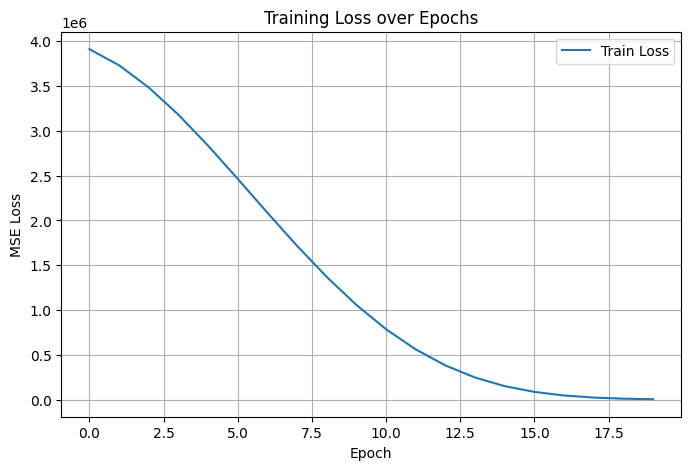

In [ ]:
BATCH_SIZE = 64
NUM_EPOCHS = 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
train_loader = DataLoaderGenerator(X_train, y_train, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoaderGenerator(X_test, y_test, batch_size=BATCH_SIZE, shuffle=True)

model = ModelVer1(
    in_features=90,
    num_layers=20,
    hidden_size=256,
    ffn_dim=512,
    activation_func=nn.ReLU()
)
optimizer = AdamW(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

trainer = ModelTrainer(num_epochs=NUM_EPOCHS)
train_mse = trainer.train(train_loader, model, optimizer, criterion)
test_mse = trainer.test(test_loader)
print(f"train MSE: {train_mse}\ntest MSE: {test_mse}")
trainer.plot_loss_history()